_S25: Computational Psycholinguistics_

**Team Project**

Swarang Joshi, 2022114010

Pranav Agarwal, 2021113018

# Compund Analysis: Frequency

In [1]:
import pandas as pd
from scipy.stats import spearmanr
from matplotlib import pyplot as plt
from sklearn.linear_model import Lasso

## Loading the Data

In [2]:
# Load the CSV data
ladec_df = pd.read_csv('data/LADECv1-2019.csv')
ladec_df.head()

,id_master,c1,c2,stim,obs,obsc1,obsc2,stimlen,c1len,c2len,...,Juhasz_tran,st_c1_mean,st_c2_mean,Zipfvalue,c1_SLlg10wf,c2_SLlg10wf,c1_BLPbncfrequency,c1_BLPbncfrequencymillion,c2_BLPbncfrequency,c2_BLPbncfrequencymillion
0,3237,gad,about,gadabout,1,4,3,8,3,5,...,NaN,NaN,NaN,1.768955,1.4314,5.2677,28.0,0.280000,197116.0,1971.16
1,4592,knock,about,knockabout,1,3,4,10,5,5,...,NaN,NaN,NaN,1.592864,3.5185,5.2677,1975.0,19.750000,197116.0,1971.16
2,8231,turn,about,turnabout,1,19,7,9,4,5,...,NaN,4.452,2.813,2.333227,4.1940,5.2677,21026.0,210.259990,197116.0,1971.16
3,6139,race,about,raceabout,1,4,1,9,4,5,...,NaN,NaN,NaN,NaN,3.4994,5.2677,7959.0,79.589996,197116.0,1971.16
4,8331,walk,about,walkabout,1,2,5,9,4,5,...,NaN,4.594,2.733,2.246077,4.0418,5.2677,10441.0,104.410000,197116.0,1971.16


In [3]:
# Load the CSV data
compounds_glove_df = pd.read_csv("./data/compounds_glove.csv")
compounds_bert_df = pd.read_csv("./data/compounds_bert.csv")
compounds_df = pd.merge(
    compounds_glove_df, compounds_bert_df,
    on=['Compound','left','right', 'TRAN', 'LMD'], how='inner'
)
compounds_df

,Compound,left,right,TRAN,LMD,glove_LMD,glove_TRAN,bert_LMD,bert_TRAN
0,aboveground,above,ground,6.200000,4.000000,5.176486,0.879524,3.042942,4.758105
1,airbase,air,base,4.266667,5.866667,5.454429,3.403150,5.578537,3.638881
2,airborne,air,borne,3.857143,3.133333,4.191957,2.894971,5.499195,5.501530
3,aircraft,air,craft,4.533333,4.266667,4.360665,4.090656,4.826679,4.550915
4,airfield,air,field,4.333333,5.714286,4.356041,2.900640,5.448549,3.643667
...,...,...,...,...,...,...,...,...,...
618,wordplay,word,play,4.928571,3.533333,4.075371,1.622669,4.555252,4.359366
619,worldwide,world,wide,4.928571,3.066667,4.186401,3.361379,5.166740,5.063019
620,wristwatch,wrist,watch,6.266667,6.333333,4.221955,2.503287,4.206198,4.139773
621,yardstick,yards,tick,5.866667,5.333333,5.442741,1.236868,4.045908,4.334155


In [4]:
# Find the index of the rows which dont have a pair of words in the LADEC dataset
absent_pairs = []

for index, row in compounds_df.iterrows():
    if (
        (row['Compound'] not in ladec_df['stim'].values) or
        (ladec_df[ladec_df['stim'] == row['Compound']]['BLPbncfrequency'].isnull().values[0]) or
        (ladec_df[ladec_df['stim'] == row['Compound']]['c1_BLPbncfrequency'].isnull().values[0]) or 
        (ladec_df[ladec_df['stim'] == row['Compound']]['c2_BLPbncfrequency'].isnull().values[0])
        ):
        absent_pairs.append(index)
    else:
        compounds_df.loc[index, 'freq'] = ladec_df[ladec_df['stim'] == row['Compound']]['BLPbncfrequency'].values[0]
        compounds_df.loc[index, 'l_freq'] = ladec_df[ladec_df['stim'] == row['Compound']]['c1_BLPbncfrequency'].values[0]
        compounds_df.loc[index, 'r_freq'] = ladec_df[ladec_df['stim'] == row['Compound']]['c2_BLPbncfrequency'].values[0]

print(f"Number of absent pairs: {len(absent_pairs)}")

Number of absent pairs: 306


In [5]:
# Drop the absent pairs from the dataframe
compounds_df = compounds_df.drop(absent_pairs)
compounds_df = compounds_df.reset_index(drop=True)
compounds_df

,Compound,left,right,TRAN,LMD,glove_LMD,glove_TRAN,bert_LMD,bert_TRAN,freq,l_freq,r_freq
0,aircraft,air,craft,4.533333,4.266667,4.360665,4.090656,4.826679,4.550915,6203.0,19076.0,2084.0
1,airfield,air,field,4.333333,5.714286,4.356041,2.900640,5.448549,3.643667,617.0,19076.0,15298.0
2,airflow,air,flow,6.000000,4.866667,6.039343,2.757553,4.861387,4.128243,58.0,19076.0,5244.0
3,airlift,air,lift,5.333333,5.533333,4.110052,2.689244,5.114800,4.916023,113.0,19076.0,4338.0
4,airline,air,line,3.071429,3.333333,3.432917,2.995321,4.901334,4.533047,1070.0,19076.0,22689.0
...,...,...,...,...,...,...,...,...,...,...,...,...
312,witchcraft,witch,craft,5.000000,3.666667,2.643001,2.695752,4.831692,5.097688,311.0,616.0,2084.0
313,wordplay,word,play,4.928571,3.533333,4.075371,1.622669,4.555252,4.359366,16.0,19379.0,21604.0
314,wristwatch,wrist,watch,6.266667,6.333333,4.221955,2.503287,4.206198,4.139773,74.0,1056.0,9557.0
315,yardstick,yards,tick,5.866667,5.333333,5.442741,1.236868,4.045908,4.334155,161.0,3267.0,4357.0


## Correlation

In [6]:
# Finding Spearman correlation between the frequency and LMD and ST
corr_lmd = spearmanr(compounds_df['freq'], compounds_df['LMD'])
corr_st = spearmanr(compounds_df['freq'], compounds_df['TRAN'])

corr_lmd_glove = spearmanr(compounds_df['freq'], compounds_df['glove_LMD'])
corr_st_glove = spearmanr(compounds_df['freq'], compounds_df['glove_TRAN'])

corr_lmd_bert = spearmanr(compounds_df['freq'], compounds_df['bert_LMD'])
corr_st_bert = spearmanr(compounds_df['freq'], compounds_df['bert_TRAN'])

print(f"Spearman correlation between frequency")
print(f"\tand LMD:\t{corr_lmd[0]:.4f}, p-value: {corr_lmd[1]:.4f}")
print(f"\tand ST:\t{corr_st[0]:.4f}, p-value: {corr_st[1]:.4f}")
print(f"\tand LMD (Glove):\t{corr_lmd_glove[0]:.4f}, p-value: {corr_lmd_glove[1]:.4f}")
print(f"\tand ST (Glove):\t{corr_st_glove[0]:.4f}, p-value: {corr_st_glove[1]:.4f}")
print(f"\tand LMD (Bert):\t{corr_lmd_bert[0]:.4f}, p-value: {corr_lmd_bert[1]:.4f}")
print(f"\tand ST (Bert):\t{corr_st_bert[0]:.4f}, p-value: {corr_st_bert[1]:.4f}")

Spearman correlation between frequency
	and LMD:	-0.1395, p-value: 0.0129
	and ST:	-0.0588, p-value: 0.2964
	and LMD (Glove):	-0.0172, p-value: 0.7605
	and ST (Glove):	0.4410, p-value: 0.0000
	and LMD (Bert):	0.0636, p-value: 0.2588
	and ST (Bert):	0.2319, p-value: 0.0000


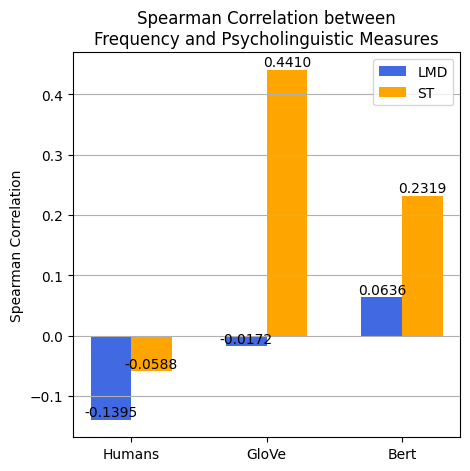

In [7]:
def plot_scorr(lmd_values, st_values, subtitle=''):
    n_bars = 3
    width = 0.6 - n_bars * 0.1
    judges = ['Humans', 'GloVe', 'Bert']

    plt.figure(figsize=(5, 5))
    plt.bar(range(n_bars), lmd_values, width=width, color='royalblue', label='LMD')
    for i, v in enumerate(lmd_values):
        plt.text(i, v + 0.0005, f"{v:.4f}", ha='center', va='bottom')
    plt.bar([x + width for x in range(n_bars)], st_values, width=width, color='orange', label='ST')
    for i, v in enumerate(st_values):
        plt.text(i + width, v + 0.0005, f"{v:.4f}", ha='center', va='bottom')
    plt.xticks([x + width / 2 for x in range(n_bars)], judges)
    plt.grid(axis = 'y')
    plt.ylabel('Spearman Correlation')
    plt.title(f'Spearman Correlation between\nFrequency{subtitle} and Psycholinguistic Measures')
    plt.legend()
    plt.show()

lmd_values = [corr_lmd[0], corr_lmd_glove[0], corr_lmd_bert[0]]
st_values = [corr_st[0], corr_st_glove[0], corr_st_bert[0]]
plot_scorr(lmd_values, st_values)


In [8]:
# Finding Spearman correlation between the frequency and LMD and ST
corr_lmd = spearmanr(-compounds_df['l_freq'] + compounds_df['r_freq'], compounds_df['LMD'])
corr_st = spearmanr(-compounds_df['l_freq'] + compounds_df['r_freq'], compounds_df['TRAN'])

corr_lmd_glove = spearmanr(-compounds_df['l_freq'] + compounds_df['r_freq'], compounds_df['glove_LMD'])
corr_st_glove = spearmanr(-compounds_df['l_freq'] + compounds_df['r_freq'], compounds_df['glove_TRAN'])

corr_lmd_bert = spearmanr(-compounds_df['l_freq'] + compounds_df['r_freq'], compounds_df['bert_LMD'])
corr_st_bert = spearmanr(-compounds_df['l_freq'] + compounds_df['r_freq'], compounds_df['bert_TRAN'])

print(f"Spearman correlation between R - L frequency")
print(f"\tand LMD:\t{corr_lmd[0]:.4f}, p-value: {corr_lmd[1]:.4f}")
print(f"\tand ST:\t{corr_st[0]:.4f}, p-value: {corr_st[1]:.4f}")
print(f"\tand LMD (Glove):\t{corr_lmd_glove[0]:.4f}, p-value: {corr_lmd_glove[1]:.4f}")
print(f"\tand ST (Glove):\t{corr_st_glove[0]:.4f}, p-value: {corr_st_glove[1]:.4f}")

Spearman correlation between R - L frequency
	and LMD:	-0.1714, p-value: 0.0022
	and ST:	-0.0351, p-value: 0.5334
	and LMD (Glove):	-0.4345, p-value: 0.0000
	and ST (Glove):	0.0091, p-value: 0.8722


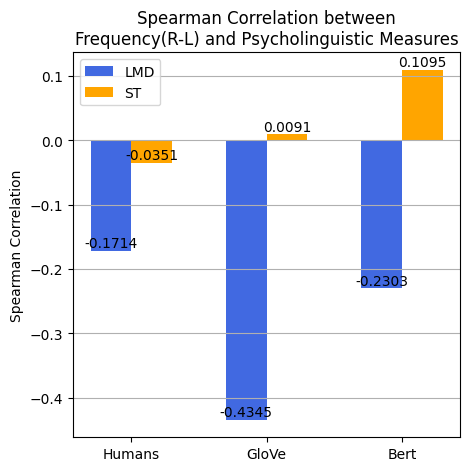

In [9]:
lmd_values = [corr_lmd[0], corr_lmd_glove[0], corr_lmd_bert[0]]
st_values = [corr_st[0], corr_st_glove[0], corr_st_bert[0]]
plot_scorr(lmd_values, st_values, subtitle='(R-L)')

In [10]:
# Finding Spearman correlation between the frequency and LMD and ST
corr_lmd = spearmanr(compounds_df['l_freq'] - compounds_df['r_freq'], compounds_df['LMD'])
corr_st = spearmanr(compounds_df['l_freq'] - compounds_df['r_freq'], compounds_df['TRAN'])

corr_lmd_glove = spearmanr(compounds_df['l_freq'] - compounds_df['r_freq'], compounds_df['glove_LMD'])
corr_st_glove = spearmanr(compounds_df['l_freq'] - compounds_df['r_freq'], compounds_df['glove_TRAN'])

print(f"Spearman correlation between R + L frequency")
print(f"\tand LMD:\t{corr_lmd[0]:.4f}, p-value: {corr_lmd[1]:.4f}")
print(f"\tand ST:\t{corr_st[0]:.4f}, p-value: {corr_st[1]:.4f}")
print(f"\tand LMD (Glove):\t{corr_lmd_glove[0]:.4f}, p-value: {corr_lmd_glove[1]:.4f}")
print(f"\tand ST (Glove):\t{corr_st_glove[0]:.4f}, p-value: {corr_st_glove[1]:.4f}")

Spearman correlation between R + L frequency
	and LMD:	0.1714, p-value: 0.0022
	and ST:	0.0351, p-value: 0.5334
	and LMD (Glove):	0.4345, p-value: 0.0000
	and ST (Glove):	-0.0091, p-value: 0.8722


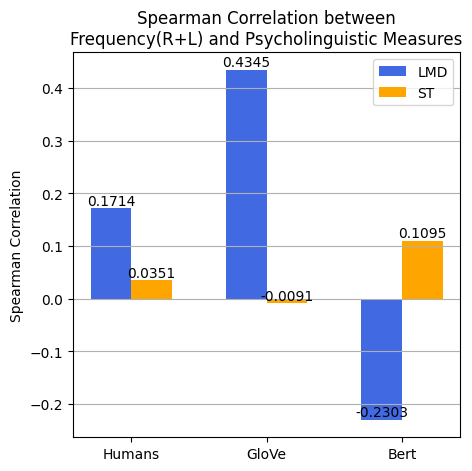

In [11]:
lmd_values = [corr_lmd[0], corr_lmd_glove[0], corr_lmd_bert[0]]
st_values = [corr_st[0], corr_st_glove[0], corr_st_bert[0]]
plot_scorr(lmd_values, st_values, subtitle='(R+L)')

## Training Regressor Predicting LMD and ST

In [12]:
# Fitting Regressors 
train_set = compounds_df.sample(frac=0.7, random_state=42)
test_set = compounds_df.drop(train_set.index) 

In [13]:
freq_lmd_model = Lasso()
independent_vars = ['freq', 'l_freq', 'r_freq']
freq_lmd_model.fit(train_set[independent_vars], train_set['LMD'])

freq_st_model = Lasso()
freq_st_model.fit(train_set[independent_vars], train_set['TRAN'])

freq_glove_lmd_model = Lasso()
freq_glove_lmd_model.fit(train_set[independent_vars], train_set['glove_LMD'])

freq_glove_st_model = Lasso()
freq_glove_st_model.fit(train_set[independent_vars], train_set['glove_TRAN'])

freq_bert_lmd_model = Lasso()
freq_bert_lmd_model.fit(train_set[independent_vars], train_set['bert_LMD'])

freq_bert_st_model = Lasso()
freq_bert_st_model.fit(train_set[independent_vars], train_set['bert_TRAN'])

Lasso()

In [14]:
# Predict on the test set
# Get R^2 score for both models
lmd_r2 = freq_lmd_model.score(test_set[independent_vars], test_set['LMD'])
st_r2 = freq_st_model.score(test_set[independent_vars], test_set['TRAN'])
glove_lmd_r2 = freq_glove_lmd_model.score(test_set[independent_vars], test_set['glove_LMD'])
glove_st_r2 = freq_glove_st_model.score(test_set[independent_vars], test_set['glove_TRAN'])
bert_lmd_r2 = freq_bert_lmd_model.score(test_set[independent_vars], test_set['bert_LMD'])
bert_st_r2 = freq_bert_st_model.score(test_set[independent_vars], test_set['bert_TRAN'])

# Get MAE for both models
lmd_mae = ((test_set['LMD'] - freq_lmd_model.predict(test_set[independent_vars]))).abs().mean()
st_mae = ((test_set['TRAN'] - freq_st_model.predict(test_set[independent_vars]))).abs().mean()
glove_lmd_mae = ((test_set['glove_LMD'] - freq_glove_lmd_model.predict(test_set[independent_vars]))).abs().mean()
glove_st_mae = ((test_set['glove_TRAN'] - freq_glove_st_model.predict(test_set[independent_vars]))).abs().mean()
bert_lmd_mae = ((test_set['bert_LMD'] - freq_bert_lmd_model.predict(test_set[independent_vars]))).abs().mean()
bert_st_mae = ((test_set['bert_TRAN'] - freq_bert_st_model.predict(test_set[independent_vars]))).abs().mean()


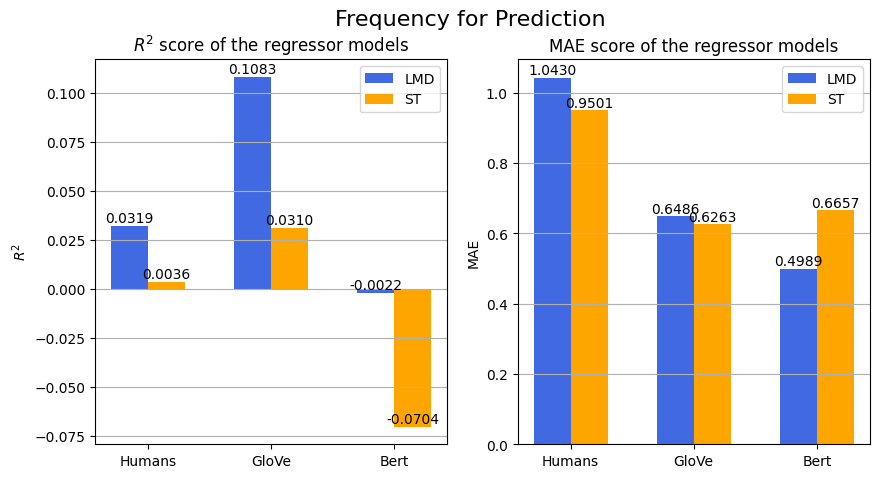

In [15]:
# Plot R^2 and MAE in 2 plots and add the values as labels
judges = ['Humans', 'GloVe', 'Bert']
n_bars = 3
width = 0.6 - n_bars * 0.1

plt.figure(figsize=(10,5))
plt.suptitle('Frequency for Prediction', fontsize=16)

#   R^2
plt.subplot(1, 2, 1)
plt.bar(range(n_bars), [lmd_r2, glove_lmd_r2, bert_lmd_r2], width=width, color='royalblue', label='LMD')
for i, v in enumerate([lmd_r2, glove_lmd_r2, bert_lmd_r2]):
    plt.text(i, v + 0.0005, f"{v:.4f}", ha='center', va='bottom')

plt.bar([x + width for x in range(n_bars)], [st_r2, glove_st_r2, bert_st_r2], width=width, color='orange', label='ST')
for i, v in enumerate([st_r2, glove_st_r2, bert_st_r2]):
    plt.text(i + width, v + 0.0005, f"{v:.4f}", ha='center', va='bottom')
plt.xticks([x + width / 2 for x in range(n_bars)], judges)
plt.grid(axis = 'y')
plt.ylabel(r'$R^2$')
plt.title(r'$R^2$ score of the regressor models')
plt.legend()

#   MAE
plt.subplot(1, 2, 2)
plt.bar(range(n_bars), [lmd_mae, glove_lmd_mae, bert_lmd_mae], width=width, color='royalblue', label='LMD')
for i, v in enumerate([lmd_mae, glove_lmd_mae, bert_lmd_mae]):
    plt.text(i, v + 0.0005, f"{v:.4f}", ha='center', va='bottom')

plt.bar([x + width for x in range(n_bars)], [st_mae, glove_st_mae, bert_st_mae], width=width, color='orange', label='ST')
for i, v in enumerate([st_mae, glove_st_mae, bert_st_mae]):
    plt.text(i + width, v + 0.0005, f"{v:.4f}", ha='center', va='bottom')
plt.xticks([x + width / 2 for x in range(n_bars)], judges)
plt.grid(axis = 'y')
plt.ylabel(r'MAE')
plt.title(r'MAE score of the regressor models')
plt.legend()
plt.show()

### Saving Regressor's results

In [16]:
# Predicting human judgements
freq_lmd_pred = freq_lmd_model.predict(
    compounds_df[independent_vars]
)
freq_st_pred = freq_st_model.predict(
    compounds_df[independent_vars]
)

# Predicting values from Glove embeddings
freq_glove_lmd_pred = freq_glove_lmd_model.predict(
    compounds_df[independent_vars]
)
freq_glove_st_pred = freq_glove_st_model.predict(
    compounds_df[independent_vars]
)

# Predicting values from Glove embeddings
freq_bert_lmd_pred = freq_bert_lmd_model.predict(
    compounds_df[independent_vars]
)
freq_bert_st_pred = freq_bert_st_model.predict(
    compounds_df[independent_vars]
)

In [17]:
# Saving to a CSV file
predictions_df = pd.DataFrame(
    data={
        'Compound' : compounds_df['Compound'].values,
        'left' : compounds_df['left'].values,
        'right' : compounds_df['right'].values,
        'freq_TRAN' : freq_st_pred,
        'freq_LMD' : freq_lmd_pred,
        'freq_glove_TRAN' : freq_glove_st_pred,
        'freq_glove_LMD' : freq_glove_lmd_pred,
        'freq_bert_TRAN' : freq_bert_st_pred,
        'freq_bert_LMD' : freq_bert_lmd_pred
    }
)
predictions_df.head()

,Compound,left,right,freq_TRAN,freq_LMD,freq_glove_TRAN,freq_glove_LMD,freq_bert_TRAN,freq_bert_LMD
0,aircraft,air,craft,4.187156,4.927734,4.145050,4.820422,4.523907,4.496965
1,airfield,air,field,4.764073,5.309288,2.175278,5.032066,4.306892,4.785409
2,airflow,air,flow,4.832777,5.454315,2.007674,5.133169,4.251310,4.831927
3,airlift,air,lift,4.827845,5.457846,2.029081,5.136536,4.251137,4.830291
4,airline,air,line,4.709127,5.198867,2.313064,4.955450,4.349683,4.748885


In [18]:
predictions_df.to_csv('data/predictions/frequency.csv')